In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | cherskiy
Processing Record 5 of Set 1 | dalby
Processing Record 6 of Set 1 | vinh
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | xinan
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | ust-barguzin
Processing Record 12 of Set 1 | berdigestyakh
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | praia da vitoria
Processing Record 15 of Set 1 | kaohsiung
Processing Record 16 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | saint-augustin
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | aquin
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | port elizabeth
Pro

Processing Record 34 of Set 4 | dubrovnik
Processing Record 35 of Set 4 | oranjemund
Processing Record 36 of Set 4 | sitka
Processing Record 37 of Set 4 | konakovo
Processing Record 38 of Set 4 | pingdingshan
Processing Record 39 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 40 of Set 4 | yate
Processing Record 41 of Set 4 | teavaro
Processing Record 42 of Set 4 | new norfolk
Processing Record 43 of Set 4 | castro
Processing Record 44 of Set 4 | kavieng
Processing Record 45 of Set 4 | pasighat
Processing Record 46 of Set 4 | iracoubo
Processing Record 47 of Set 4 | faanui
Processing Record 48 of Set 4 | tarko-sale
Processing Record 49 of Set 4 | tilichiki
Processing Record 50 of Set 4 | yara
Processing Record 1 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 5 | gweta
Processing Record 3 of Set 5 | lebu
Processing Record 4 of Set 5 | makakilo city
Processing Record 5 of Set 5 | opuwo
Processing Record 6 of Set 5 | narsaq
Processing Re

Processing Record 24 of Set 8 | la orilla
Processing Record 25 of Set 8 | warwick
Processing Record 26 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 27 of Set 8 | mackay
Processing Record 28 of Set 8 | bilma
Processing Record 29 of Set 8 | muli
Processing Record 30 of Set 8 | ust-tsilma
Processing Record 31 of Set 8 | katsuura
Processing Record 32 of Set 8 | neuquen
Processing Record 33 of Set 8 | dolores
Processing Record 34 of Set 8 | amahai
Processing Record 35 of Set 8 | okhotsk
Processing Record 36 of Set 8 | saint-francois
Processing Record 37 of Set 8 | chapais
Processing Record 38 of Set 8 | gorno-chuyskiy
City not found. Skipping...
Processing Record 39 of Set 8 | samarai
Processing Record 40 of Set 8 | xadani
City not found. Skipping...
Processing Record 41 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 42 of Set 8 | ballitoville
Processing Record 43 of Set 8 | vila velha
Processing Record 44 of Set 8 | naustdal
Processing Record 45 

Processing Record 12 of Set 12 | loa janan
Processing Record 13 of Set 12 | necochea
Processing Record 14 of Set 12 | nuuk
Processing Record 15 of Set 12 | kiryas joel
Processing Record 16 of Set 12 | barra do garcas
Processing Record 17 of Set 12 | santa fe de la laguna
Processing Record 18 of Set 12 | madison
Processing Record 19 of Set 12 | ridgecrest
Processing Record 20 of Set 12 | gorkovskoye
City not found. Skipping...
Processing Record 21 of Set 12 | itoman
Processing Record 22 of Set 12 | podzvizd
Processing Record 23 of Set 12 | abalak
Processing Record 24 of Set 12 | gigmoto
Processing Record 25 of Set 12 | cerritos
Processing Record 26 of Set 12 | harper
Processing Record 27 of Set 12 | hay river
Processing Record 28 of Set 12 | najran
Processing Record 29 of Set 12 | muroto
Processing Record 30 of Set 12 | gap
Processing Record 31 of Set 12 | lucapa
Processing Record 32 of Set 12 | nyurba
Processing Record 33 of Set 12 | villa maria
Processing Record 34 of Set 12 | sungair

In [9]:
# Check that over 500 cities are in city_data
print(len(city_data))

562


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lompoc,34.6391,-120.4579,55.00,50,1,9.22,US,2021-03-16 18:47:50
1,Hermanus,-34.4187,19.2345,61.00,85,33,12.17,ZA,2021-03-16 18:48:19
2,Cape Town,-33.9258,18.4232,70.00,72,20,19.57,ZA,2021-03-16 18:48:19
3,Cherskiy,68.7500,161.3000,-16.82,96,99,7.87,RU,2021-03-16 18:48:19
4,Dalby,-27.1833,151.2667,63.00,93,100,1.01,AU,2021-03-16 18:48:19
5,Vinh,18.6667,105.6667,70.79,95,19,1.79,VN,2021-03-16 18:48:20
6,Albany,42.6001,-73.9662,33.01,17,100,5.91,US,2021-03-16 18:45:08
7,Xinan,26.7200,119.8556,56.19,95,16,3.29,CN,2021-03-16 18:48:20
8,Ushuaia,-54.8000,-68.3000,42.80,70,75,25.32,AR,2021-03-16 18:47:05
9,Busselton,-33.6500,115.3333,65.59,65,0,6.15,AU,2021-03-16 18:44:10


In [11]:
# Reorder the columns of the city data df.
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lompoc,US,2021-03-16 18:47:50,34.6391,-120.4579,55.00,50,1,9.22
1,Hermanus,ZA,2021-03-16 18:48:19,-34.4187,19.2345,61.00,85,33,12.17
2,Cape Town,ZA,2021-03-16 18:48:19,-33.9258,18.4232,70.00,72,20,19.57
3,Cherskiy,RU,2021-03-16 18:48:19,68.7500,161.3000,-16.82,96,99,7.87
4,Dalby,AU,2021-03-16 18:48:19,-27.1833,151.2667,63.00,93,100,1.01
5,Vinh,VN,2021-03-16 18:48:20,18.6667,105.6667,70.79,95,19,1.79
6,Albany,US,2021-03-16 18:45:08,42.6001,-73.9662,33.01,17,100,5.91
7,Xinan,CN,2021-03-16 18:48:20,26.7200,119.8556,56.19,95,16,3.29
8,Ushuaia,AR,2021-03-16 18:47:05,-54.8000,-68.3000,42.80,70,75,25.32
9,Busselton,AU,2021-03-16 18:44:10,-33.6500,115.3333,65.59,65,0,6.15


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

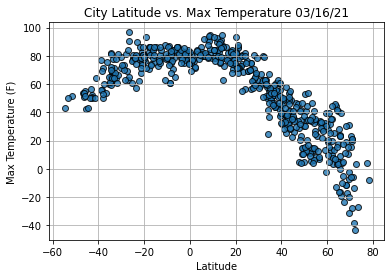

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

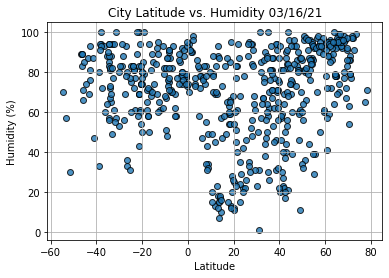

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

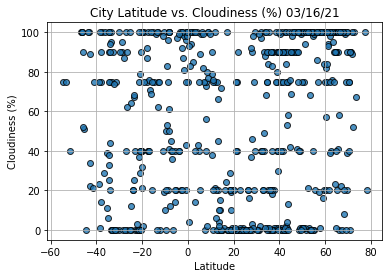

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

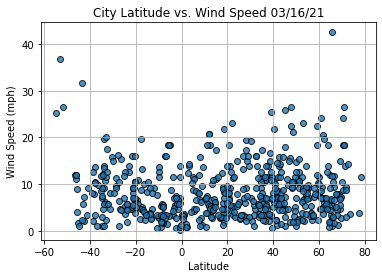

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

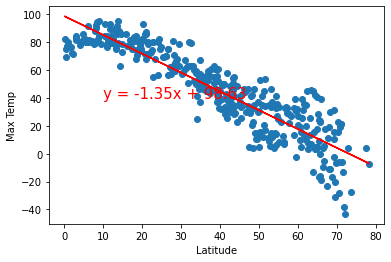

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

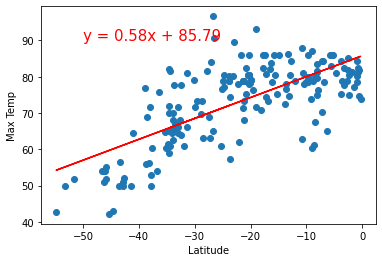

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

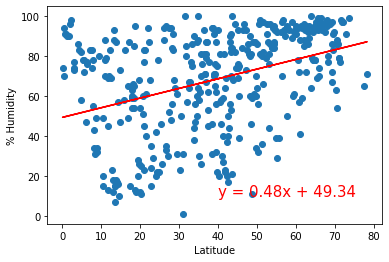

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

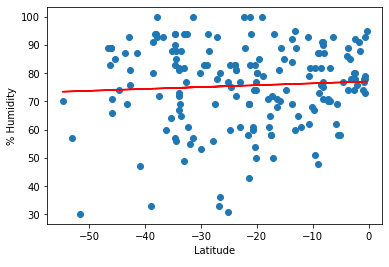

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

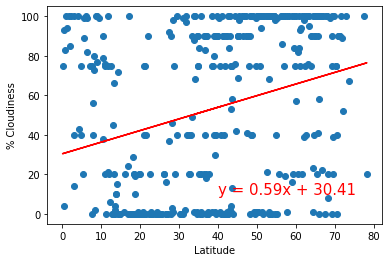

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

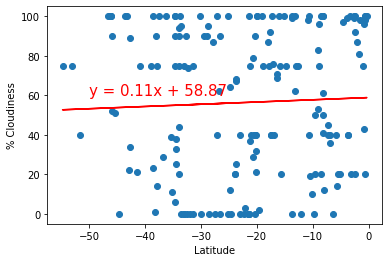

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

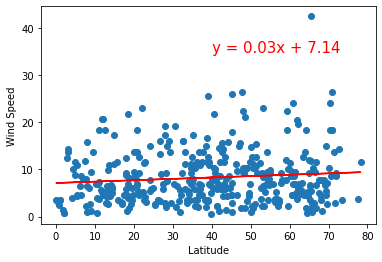

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

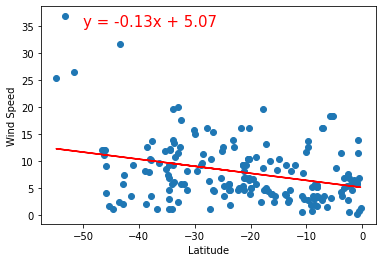

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))